### Keypoints
- Learn the complex computing, mostly based on array and xgcm 
- learn sum(dim='k').mean(dim='time'),grid.diff_2d_vector

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from dask_gateway import GatewayCluster
from dask.distributed import Client
cluster = GatewayCluster()
cluster.scale(5)
client = Client(cluster)
cluster

In [3]:
import intake
cat = intake.open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean.yaml")
print(list(cat))

['sea_surface_height', 'cesm_mom6_example', 'ECCOv4r3', 'SOSE', 'GODAS', 'ECCO_layers', 'altimetry', 'LLC4320', 'GFDL_CM2_6', 'CESM_POP', 'channel', 'MEOM_NEMO']


In [4]:
ds = cat.ECCOv4r3.to_dask()
ds

<xarray.Dataset>
Dimensions:    (time: 288, k_l: 50, face: 13, j: 90, i: 90, k: 50, i_g: 90,
                j_g: 90, time_snp: 287, k_p1: 51, k_u: 50)
Coordinates: (12/37)
    Depth      (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    PHrefC     (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefF     (k_p1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    XC         (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XG         (face, j_g, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YC         (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    ...         ...
    rA         (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAs        (face, j_g, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAw        (face, j, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAz        (face, j_g, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
  * time       (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * time_snp   (time_snp) datetime64[ns] 1992-02-01 1992-03-01 ... 2015-12-01
Data variables: (12/36)
    ADVr_SLT   (time, k_l, face, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVr_TH    (time, k_l, face, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_SLT   (time, k, face, j, i_g) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_TH    (time, k, face, j, i_g) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_SLT   (time, k, face, j_g, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_TH    (time, k, face, j_g, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ...         ...
    basins     (face, j, i) int16 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    oceFWflx   (time, face, j, i) float32 dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    oceQsw     (time, face, j, i) float32 dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    oceSPtnd   (time, k, face, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    oceTAUX    (time, face, j, i_g) float32 dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>
    oceTAUY    (time, face, j_g, i) float32 dask.array<chunksize=(1, 1, 90, 90), meta=np.ndarray>

In [5]:
# a trick to make things work a bit faster
coords = ds.coords.to_dataset().reset_coords()
ds = ds.reset_coords(drop=True)

In [6]:
ds

,Array,Chunk
Bytes,5.65 GiB,20.08 MiB
Shape,"(288, 50, 13, 90, 90)","(1, 50, 13, 90, 90)"
Count,289 Tasks,288 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,5.65 GiB,20.08 MiB
Shape,"(288, 50, 13, 90, 90)","(1, 50, 13, 90, 90)"
Count,289 Tasks,288 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [7]:
coords.Depth

<xarray.DataArray 'Depth' (face: 13, j: 90, i: 90)>
dask.array<open_dataset-6ce98bd29e773c3c1a1ea9aa1f536dfcDepth, shape=(13, 90, 90), dtype=float32, chunksize=(13, 90, 90), chunktype=numpy.ndarray>
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
Attributes:
    coordinate:     XC YC
    long_name:      ocean depth
    standard_name:  ocean_depth
    units:          m

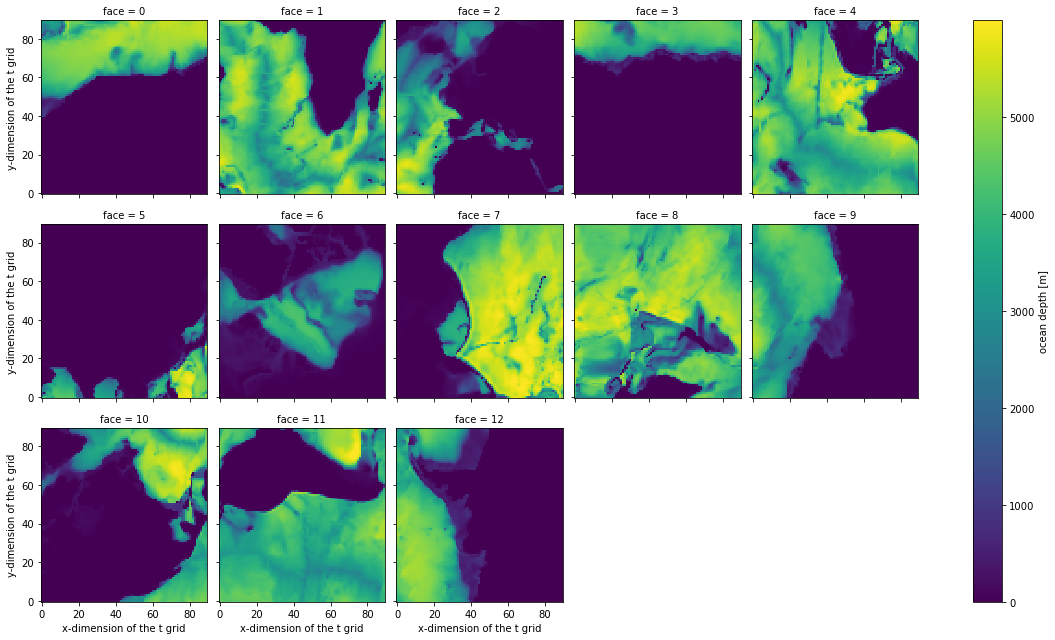

In [8]:
coords.Depth.plot(col='face', col_wrap=5)

In [9]:
from matplotlib import pyplot as plt
import cartopy as cart
import pyresample

class LLCMapper:

    def __init__(self, ds, dx=0.25, dy=0.25):
        # Extract LLC 2D coordinates
        lons_1d = ds.XC.values.ravel()
        lats_1d = ds.YC.values.ravel()

        # Define original grid
        self.orig_grid = pyresample.geometry.SwathDefinition(lons=lons_1d, lats=lats_1d)

        # Longitudes latitudes to which we will we interpolate
        lon_tmp = np.arange(-180, 180, dx) + dx/2
        lat_tmp = np.arange(-90, 90, dy) + dy/2

        # Define the lat lon points of the two parts.
        self.new_grid_lon, self.new_grid_lat = np.meshgrid(lon_tmp, lat_tmp)
        self.new_grid  = pyresample.geometry.GridDefinition(lons=self.new_grid_lon,
                                                            lats=self.new_grid_lat)

    def __call__(self, da, ax=None, projection=cart.crs.Robinson(), lon_0=-60, **plt_kwargs):

        assert set(da.dims) == set(['face', 'j', 'i']), "da must have dimensions ['face', 'j', 'i']"

        if ax is None:
            fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': projection})
        else:
            m = plt.axes(projection=projection)

        field = pyresample.kd_tree.resample_nearest(self.orig_grid, da.values,
                                                    self.new_grid,
                                                    radius_of_influence=100000,
                                                    fill_value=None)

        vmax = plt_kwargs.pop('vmax', field.max())
        vmin = plt_kwargs.pop('vmin', field.min())


        x,y = self.new_grid_lon, self.new_grid_lat

        # Find index where data is splitted for mapping
        split_lon_idx = round(x.shape[1]/(360/(lon_0 if lon_0>0 else lon_0+360)))


        p = ax.pcolormesh(x[:,:split_lon_idx], y[:,:split_lon_idx], field[:,:split_lon_idx],
                         vmax=vmax, vmin=vmin, transform=cart.crs.PlateCarree(), zorder=1, **plt_kwargs)
        p = ax.pcolormesh(x[:,split_lon_idx:], y[:,split_lon_idx:], field[:,split_lon_idx:],
                         vmax=vmax, vmin=vmin, transform=cart.crs.PlateCarree(), zorder=2, **plt_kwargs)

        ax.add_feature(cart.feature.LAND, facecolor='0.5', zorder=3)
        label = ''
        if da.name is not None:
            label = da.name
        if 'units' in da.attrs:
            label += ' [%s]' % da.attrs['units']
        cb = plt.colorbar(p, shrink=0.4, label=label)
        return ax


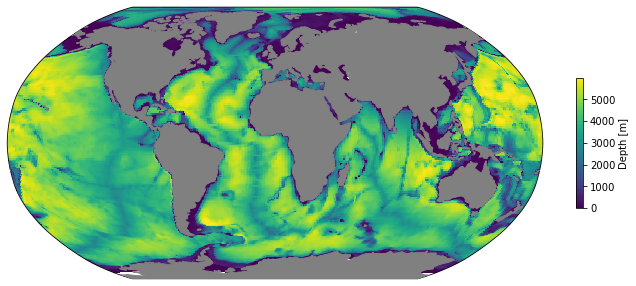

In [10]:
mapper = LLCMapper(coords)
mapper(coords.Depth);

In [11]:
sst = ds.THETA.sel(time='2000-01-15', k=0)
sst

<xarray.DataArray 'THETA' (face: 13, j: 90, i: 90)>
dask.array<getitem, shape=(13, 90, 90), dtype=float32, chunksize=(13, 90, 90), chunktype=numpy.ndarray>
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
    k        int64 0
    time     datetime64[ns] 2000-01-15
Attributes:
    long_name:      Potential Temperature
    standard_name:  THETA
    units:          degC

/srv/conda/envs/notebook/lib/python3.9/site-packages/matplotlib/colors.py:621: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


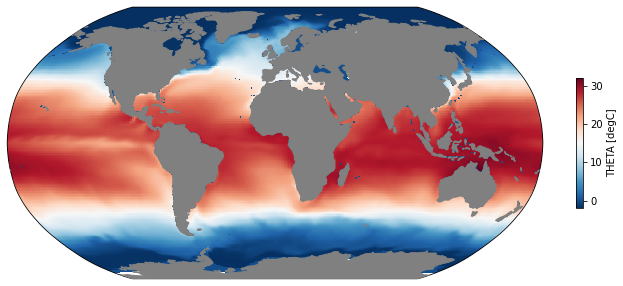

In [12]:
mapper(sst, cmap='RdBu_r');

In [13]:
mean_sst = ds.THETA.sel(k=0).mean(dim='time')
mean_sst

<xarray.DataArray 'THETA' (face: 13, j: 90, i: 90)>
dask.array<mean_agg-aggregate, shape=(13, 90, 90), dtype=float32, chunksize=(13, 90, 90), chunktype=numpy.ndarray>
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
    k        int64 0

In [14]:
%time mean_sst.load()

CPU times: user 85.4 ms, sys: 1.39 ms, total: 86.8 ms
Wall time: 11.7 s


<xarray.DataArray 'THETA' (face: 13, j: 90, i: 90)>
array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.22906627,  0.20126666,  0.18094039, ...,  0.04199786,
          0.06655131,  0.09593879],
        [ 0.43254805,  0.42036152,  0.4126501 , ...,  0.20539196,
          0.24391538,  0.29138586],
        [ 0.6535146 ,  0.65845466,  0.65769684, ...,  0.37179062,
          0.42764866,  0.49818808]],

       [[ 0.87210137,  0.89154845,  0.88329524, ...,  0.52988845,
          0.60233873,  0.6977836 ],
        [ 1.0961676 ,  1.1175991 ,  1.0779033 , ...,  0.68887544,
          0.774091  ,  0.89128804],
        [ 1.3072966 ,  1.3048965 ,  1.2159245 , ...,  0.85709995,
          0.9489381 ,  1.0793763 ],
...
        [27.479395  , 27.666166  , 27.793968  , ...,  1.4822977 ,
          1.3396592 ,  1.190825  ],
        [27.444382  , 27.641308  , 27.776764  , ...,  1.3742981 ,
          1.2040414 ,  1.031747  ],
        [27.411293  , 27.615599  , 27.76121   , ...,  1.314467  ,
          1.1131614 ,  0.91215134]],

       [[ 4.6964245 ,  4.2194605 ,  3.719968  , ...,  0.        ,
          0.        ,  0.        ],
        [ 4.747999  ,  4.2700696 ,  3.7787225 , ...,  0.        ,
          0.        ,  0.        ],
        [ 4.754464  ,  4.278542  ,  3.7964838 , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 1.0251521 ,  0.82211953,  0.58778673, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.85189605,  0.6512579 ,  0.43876594, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.71174276,  0.5037161 ,  0.30439517, ...,  0.        ,
          0.        ,  0.        ]]], dtype=float32)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
    k        int64 0

/srv/conda/envs/notebook/lib/python3.9/site-packages/matplotlib/colors.py:621: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


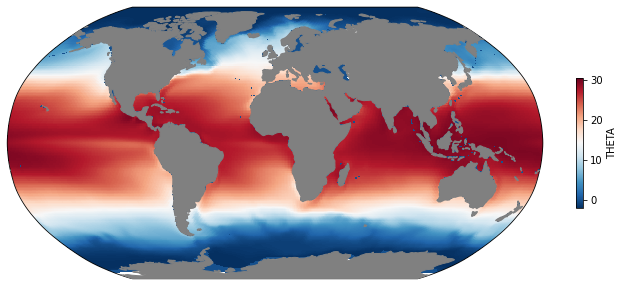

In [15]:
mapper(mean_sst, cmap='RdBu_r');

In [16]:
%time ds.THETA.isel(k=0).mean(dim='time').load()

CPU times: user 79.1 ms, sys: 6.32 ms, total: 85.5 ms
Wall time: 6.13 s


<xarray.DataArray 'THETA' (face: 13, j: 90, i: 90)>
array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.22906627,  0.20126666,  0.18094039, ...,  0.04199786,
          0.06655131,  0.09593879],
        [ 0.43254805,  0.42036152,  0.4126501 , ...,  0.20539196,
          0.24391538,  0.29138586],
        [ 0.6535146 ,  0.65845466,  0.65769684, ...,  0.37179062,
          0.42764866,  0.49818808]],

       [[ 0.87210137,  0.89154845,  0.88329524, ...,  0.52988845,
          0.60233873,  0.6977836 ],
        [ 1.0961676 ,  1.1175991 ,  1.0779033 , ...,  0.68887544,
          0.774091  ,  0.89128804],
        [ 1.3072966 ,  1.3048965 ,  1.2159245 , ...,  0.85709995,
          0.9489381 ,  1.0793763 ],
...
        [27.479395  , 27.666166  , 27.793968  , ...,  1.4822977 ,
          1.3396592 ,  1.190825  ],
        [27.444382  , 27.641308  , 27.776764  , ...,  1.3742981 ,
          1.2040414 ,  1.031747  ],
        [27.411293  , 27.615599  , 27.76121   , ...,  1.314467  ,
          1.1131614 ,  0.91215134]],

       [[ 4.6964245 ,  4.2194605 ,  3.719968  , ...,  0.        ,
          0.        ,  0.        ],
        [ 4.747999  ,  4.2700696 ,  3.7787225 , ...,  0.        ,
          0.        ,  0.        ],
        [ 4.754464  ,  4.278542  ,  3.7964838 , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 1.0251521 ,  0.82211953,  0.58778673, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.85189605,  0.6512579 ,  0.43876594, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.71174276,  0.5037161 ,  0.30439517, ...,  0.        ,
          0.        ,  0.        ]]], dtype=float32)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
    k        int64 0

In [17]:
# the monthly climatology
theta_clim = ds.THETA.groupby('time.month').mean(dim='time')
# the anomaly
theta_anom = ds.THETA.groupby('time.month') - theta_clim
rho0 = 1029
cp = 3994
ohc = rho0 * cp * (theta_anom *
                   coords.rA *
                   coords.hFacC).sum(dim=['face', 'j', 'i'])
ohc



<xarray.DataArray (time: 288, k: 50)>
dask.array<mul, shape=(288, 50), dtype=float64, chunksize=(1, 50), chunktype=numpy.ndarray>
Coordinates:
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * time     (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

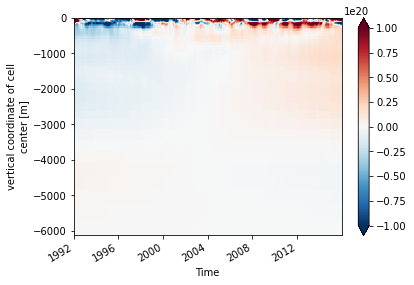

In [18]:
# actually load the data
ohc.load()
# put the depth coordinate back for plotting purposes
ohc.coords['Z'] = coords.Z
ohc.swap_dims({'k': 'Z'}).transpose().plot(vmax=1e20)

In [19]:
import xgcm

# define the connectivity between faces
face_connections = {'face':
                    {0: {'X':  ((12, 'Y', False), (3, 'X', False)),
                         'Y':  (None,             (1, 'Y', False))},
                     1: {'X':  ((11, 'Y', False), (4, 'X', False)),
                         'Y':  ((0, 'Y', False),  (2, 'Y', False))},
                     2: {'X':  ((10, 'Y', False), (5, 'X', False)),
                         'Y':  ((1, 'Y', False),  (6, 'X', False))},
                     3: {'X':  ((0, 'X', False),  (9, 'Y', False)),
                         'Y':  (None,             (4, 'Y', False))},
                     4: {'X':  ((1, 'X', False),  (8, 'Y', False)),
                         'Y':  ((3, 'Y', False),  (5, 'Y', False))},
                     5: {'X':  ((2, 'X', False),  (7, 'Y', False)),
                         'Y':  ((4, 'Y', False),  (6, 'Y', False))},
                     6: {'X':  ((2, 'Y', False),  (7, 'X', False)),
                         'Y':  ((5, 'Y', False),  (10, 'X', False))},
                     7: {'X':  ((6, 'X', False),  (8, 'X', False)),
                         'Y':  ((5, 'X', False),  (10, 'Y', False))},
                     8: {'X':  ((7, 'X', False),  (9, 'X', False)),
                         'Y':  ((4, 'X', False),  (11, 'Y', False))},
                     9: {'X':  ((8, 'X', False),  None),
                         'Y':  ((3, 'X', False),  (12, 'Y', False))},
                     10: {'X': ((6, 'Y', False),  (11, 'X', False)),
                          'Y': ((7, 'Y', False),  (2, 'X', False))},
                     11: {'X': ((10, 'X', False), (12, 'X', False)),
                          'Y': ((8, 'Y', False),  (1, 'X', False))},
                     12: {'X': ((11, 'X', False), None),
                          'Y': ((9, 'Y', False),  (0, 'X', False))}}}

# create the grid object
grid = xgcm.Grid(ds, periodic=False, face_connections=face_connections)
grid

<xgcm.Grid>
Y Axis (not periodic, boundary=None):
  * center   j --> left
  * left     j_g --> center
X Axis (not periodic, boundary=None):
  * center   i --> left
  * left     i_g --> center
Z Axis (not periodic, boundary=None):
  * center   k --> left
  * left     k_l --> center
  * outer    k_p1 --> center
  * right    k_u --> center
T Axis (not periodic, boundary=None):
  * center   time --> inner
  * inner    time_snp --> center

In [21]:
ds

,Array,Chunk
Bytes,5.65 GiB,20.08 MiB
Shape,"(288, 50, 13, 90, 90)","(1, 50, 13, 90, 90)"
Count,289 Tasks,288 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,5.65 GiB,20.08 MiB
Shape,"(288, 50, 13, 90, 90)","(1, 50, 13, 90, 90)"
Count,289 Tasks,288 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [22]:
# vertical integral and time mean of horizontal diffusive heat flux
advx_th_vint = ds.ADVx_TH.sum(dim='k').mean(dim='time')
advy_th_vint = ds.ADVy_TH.sum(dim='k').mean(dim='time')


In [23]:
advx_th_vint

<xarray.DataArray 'ADVx_TH' (face: 13, j: 90, i_g: 90)>
dask.array<mean_agg-aggregate, shape=(13, 90, 90), dtype=float32, chunksize=(13, 90, 90), chunktype=numpy.ndarray>
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89

In [24]:
advy_th_vint

<xarray.DataArray 'ADVy_TH' (face: 13, j_g: 90, i: 90)>
dask.array<mean_agg-aggregate, shape=(13, 90, 90), dtype=float32, chunksize=(13, 90, 90), chunktype=numpy.ndarray>
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89

In [ ]:
grid

<xgcm.Grid>
Y Axis (not periodic, boundary=None):
  * center   j --> left
  * left     j_g --> center
X Axis (not periodic, boundary=None):
  * center   i --> left
  * left     i_g --> center
Z Axis (not periodic, boundary=None):
  * center   k --> left
  * left     k_l --> center
  * outer    k_p1 --> center
  * right    k_u --> center
T Axis (not periodic, boundary=None):
  * center   time --> inner
  * inner    time_snp --> center

In [28]:
# difference in the x and y directions
# diff_ADV_th = grid.diff_2d_vector({'X': advx_th_vint, 'Y': advy_th_vint}, boundary='fill')
diff_ADV_th = grid.diff_2d_vector({'X': advx_th_vint, 'Y': advy_th_vint}, boundary='fill')

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/array/core.py:455: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)
/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/array/utils.py:138: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  meta = func(*args_meta, **kwargs_meta)


ValueError: The truth value of a Array is ambiguous. Use a.any() or a.all().

2022-08-10 02:23:59,651 - distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client


In [73]:
# convergence
conv_ADV_th = -diff_ADV_th['X'] - diff_ADV_th['Y']
conv_ADV_th

NameError: name 'diff_ADV_th' is not defined

In [ ]:
# convert to Watts / m^2 and load
mean_adv_conv = rho0 * cp * (conv_ADV_th/coords.rA).fillna(0.).load()
mean_dif_conv = rho0 * cp * (conv_DIF_th/coords.rA).fillna(0.).load()

In [ ]:
ax = mapper(mean_adv_conv, cmap='RdBu_r', vmax=300, vmin=-300);
ax.set_title(r'Convergence of Advective Flux (W/m$^2$)');

In [ ]:
ax = mapper(mean_dif_conv, cmap='RdBu_r', vmax=300, vmin=-300)
ax.set_title(r'Convergence of Diffusive Flux (W/m$^2$)');

In [ ]:
ax = mapper(mean_dif_conv + mean_adv_conv, cmap='RdBu_r', vmax=300, vmin=-300)
ax.set_title(r'Convergence of Net Horizontal Flux (W/m$^2$)');

In [ ]:
ax = mapper(ds.TFLUX.mean(dim='time').load(), cmap='RdBu_r', vmax=300, vmin=-300);
ax.set_title(r'Surface Heat Flux (W/m$^2$)');
